# Classifying newswires
## a multiclass classification example

In [1]:
from keras.datasets import reuters

# 로이터(reuters): 영국에 있는 통신사.
# reuters dataset: 총 46가지 토픽의 기사(article). 9000개의 train데이터, 2000개의 test데이터.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [22]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
# Class: 46가지의 토픽. (0 이상, 45 이하의 값)
min(train_labels), max(train_labels), train_labels[10]

(0, 45, 3)

In [6]:
# Vectorize (3.4에서 본 것과 같은 방식의 Vectorize)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [8]:
# 딥러닝 모델의 결과는 46개의 숫자 (클래스가 총 46가지이기 때문) 이며,
# 4번째 클래스일 가능성이 높다면 4번째의 숫자가 1에 가깝고, 나머지 45개의 숫자는 0에 가깝게 나오도록 학습하고자 한다.
# 이러한 결과를 얻기 위해, 학습 데이터의 라벨링을 one-hot으로 하여 학습에 이용한다.

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print( train_labels[0], "=>", one_hot_train_labels[0] )

3 => [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# 위 to_one_hot 함수와 같은 기능을 keras에서 기본으로도 제공한다.

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print( train_labels[0], "=>", one_hot_train_labels[0] )

3 => [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# 딥 뉴럴 네트워크 구성

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

print (x_val.shape, partial_x_train.shape)

(1000, 10000) (7982, 10000)


In [11]:
# 학습 진행

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 326us/step - loss: 2.5309 - acc: 0.4964 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.4443 - acc: 0.6882 - val_loss: 1.3455 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.0958 - acc: 0.7651 - val_loss: 1.1713 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.8704 - acc: 0.8161 - val_loss: 1.0792 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.7040 - acc: 0.8472 - val_loss: 0.9851 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.5680 - acc: 0.8797 - val_loss: 0.9410 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 178us/step - loss: 0.4612 - acc: 0.9030 - val_loss: 0.9088 - val_acc: 0.7990


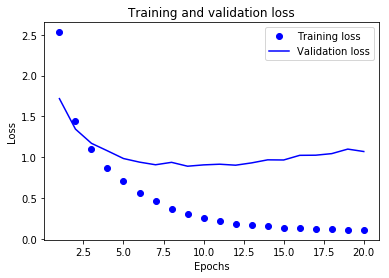

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

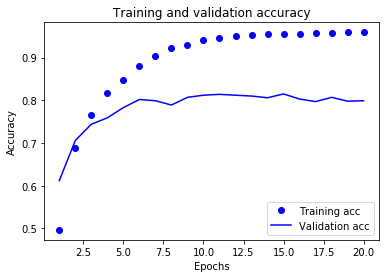

In [13]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 183us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 146us/step - loss: 1.3711 - acc: 0.7121 - val_loss: 1.2754 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 143us/step - loss: 1.0134 - acc: 0.7789 - val_loss: 1.1299 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.7974 - acc: 0.8251 - val_loss: 1.0533 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.6391 - acc: 0.8628 - val_loss: 0.9749 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 144us/step - loss: 0.5113 - acc: 0.8925 - val_loss: 0.9098 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 144us/step - loss: 0.4104 - acc: 0.9147 - val_loss: 0.8903 - val_acc: 0.8210
Epoch 8

In [15]:
results = model.evaluate(x_test, one_hot_test_labels)

print( "loss: ", results[0], ", accuracy:", results[1])

2246/2246 [==============================] - 1s 244us/step
loss:  1.0243834205111115 , accuracy: 0.7756010686194165


In [16]:
# accuracy가 80% 가까이 나왔다.
# 만약 그저 랜덤 classifier라면, binary classifier에서는 50% 이겠지만,
# 46개의 클래스인 이 데이터셋에서는 아래 코드에서 확인할 수 있듯 19% 정도밖에 되지 않는다.

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

print( float(np.sum(hits_array)) / len(test_labels) )

0.182546749777382


In [17]:
# 위 model.evaluate()는 test 데이터 전체에 대한 loss, accuracy를 보여줬다면,
# model.predict()는 test 데이터의 각 샘플의 추론 결과 (46개의 확률값)를 보여준다,

predictions = model.predict(x_test)

print( x_test.shape )
print( predictions.shape )

print( "Sum:", np.sum(predictions[0]) )
print( "ArgMax:", np.argmax(predictions[0]) )
print( "Probability:", predictions[0][3] )

(2246, 10000)
(2246, 46)
Sum: 0.9999999
ArgMax: 3
Probability: 0.9717181


### 최종 결과 (softmax의 결과)가 46개의 숫자이기 때문에, 그 전의 히든 레이어는 적어도 46개 이상의 노드를 가지는 것이 좋다. 충분한 정보가 필요하기 때문이다.

#hidden layer 64 --> 4 를 확인해보면 accuracy가 현저히 떨어진다.

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 237us/step - loss: 2.6576 - acc: 0.3773 - val_loss: 1.9684 - val_acc: 0.5280
Epoch 2/9
7982/7982 [==============================] - 2s 236us/step - loss: 1.6652 - acc: 0.6213 - val_loss: 1.5408 - val_acc: 0.6230
Epoch 3/9
7982/7982 [==============================] - 2s 273us/step - loss: 1.3324 - acc: 0.6704 - val_loss: 1.3940 - val_acc: 0.6790
Epoch 4/9
7982/7982 [==============================] - 2s 227us/step - loss: 1.1420 - acc: 0.7268 - val_loss: 1.3262 - val_acc: 0.6970
Epoch 5/9
7982/7982 [==============================] - 2s 239us/step - loss: 1.0111 - acc: 0.7456 - val_loss: 1.2697 - val_acc: 0.7000
Epoch 6/9
7982/7982 [==============================] - 2s 208us/step - loss: 0.9099 - acc: 0.7578 - val_loss: 1.2759 - val_acc: 0.7060
Epoch 7/9
7982/7982 [==============================] - 2s 201us/step - loss: 0.8304 - acc: 0.7736 - val_loss: 1.2605 - val_acc: 0.7110
Epoch 8

In [21]:
results = model.evaluate(x_test, one_hot_test_labels)

print( "loss: ", results[0], ", accuracy:", results[1])

2246/2246 [==============================] - 0s 134us/step
loss:  1.4113297636553526 , accuracy: 0.6896705254315268


### Accuracy 77% --> 69%

끝. <br><br><br>